In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [375]:
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [376]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [377]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [378]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [379]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [380]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

PreProcessing Data

In [381]:
from sklearn import preprocessing

In [382]:
lb_enc = preprocessing.LabelEncoder()
print(data['gender'].unique())
data['gender'] = lb_enc.fit_transform(data['gender'])
data['gender'].unique()

['Male' 'Female' 'Other']


array([1, 0, 2])

In [383]:
print(data['work_type'].unique())
data['work_type'] = lb_enc.fit_transform(data['work_type'])
data['work_type'].unique()

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


array([2, 3, 0, 4, 1])

In [384]:
print(data['ever_married'].unique())
data['ever_married'] = lb_enc.fit_transform(data['ever_married'])
data['ever_married'].unique()

['Yes' 'No']


array([1, 0])

In [385]:
data['smoking_status'] = data['smoking_status'].replace(['Unknown'],'never smoked')

In [386]:
print(data['smoking_status'].unique())
data['smoking_status'] = lb_enc.fit_transform(data['smoking_status'])
data['smoking_status'].unique()

['formerly smoked' 'never smoked' 'smokes']


array([0, 1, 2])

In [387]:
print(data['Residence_type'].unique())
data['Residence_type'] = lb_enc.fit_transform(data['Residence_type'])
data['Residence_type'].unique()

['Urban' 'Rural']


array([1, 0])

In [388]:
data.shape

(5110, 12)

In [389]:
pd.DataFrame.corr(data)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.002511,0.003538,0.003550,-0.001296,0.013690,-0.015757,-0.001403,0.001092,0.003084,-0.004533,0.006388
gender,0.002511,1.000000,-0.028202,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.055180,-0.026678,-0.022364,0.008929
age,0.003538,-0.028202,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.333398,-0.110513,0.245257
hypertension,0.003550,0.020994,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.167811,-0.019199,0.127904
heart_disease,-0.001296,0.085447,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.041357,-0.016367,0.134914
ever_married,0.013690,-0.031005,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.341695,-0.046820,0.108340
work_type,-0.015757,0.056422,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.304876,-0.020051,-0.032316
Residence_type,-0.001403,-0.006738,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,-0.000122,0.012160,0.015458
avg_glucose_level,0.001092,0.055180,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.175502,-0.033910,0.131945
bmi,0.003084,-0.026678,0.333398,0.167811,0.041357,0.341695,-0.304876,-0.000122,0.175502,1.000000,-0.015378,0.042374


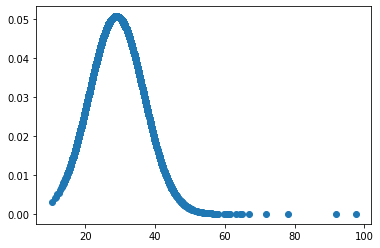

In [390]:
from scipy.stats import norm
plt.plot(data['bmi'], norm.pdf(data['bmi'], data['bmi'].mean(), data['bmi'].std()),'o')

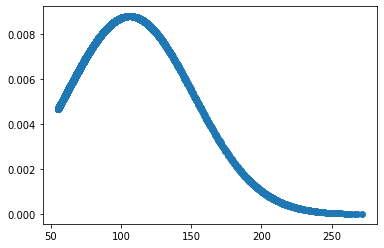

In [391]:
plt.plot(data['avg_glucose_level'], norm.pdf(data['avg_glucose_level'], data['avg_glucose_level'].mean(), data['avg_glucose_level'].std()),'o')

In [392]:
for i in data.columns:     #df.columns[w:] if you have w column of line description 
    data[i] = data[i].fillna(data[i].median() )
print(data.isnull().any())

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool


In [393]:
data.isna().sum()#data = data.fillna(value=0)

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

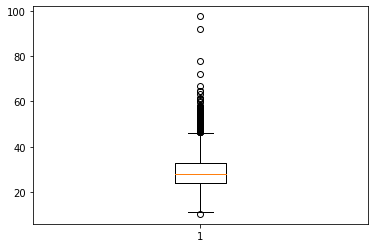

In [394]:
plt.boxplot(data['bmi'])
plt.show()

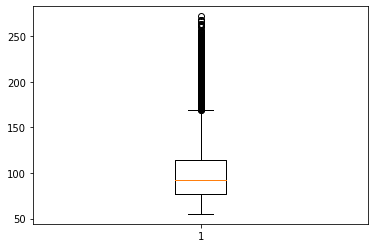

In [395]:
plt.boxplot(data['avg_glucose_level'])
plt.show()

Outlier Treatment

In [396]:
print(data['avg_glucose_level'].quantile(0.7))
print(data['avg_glucose_level'].quantile(0.9))
data['avg_glucose_level'] = np.where(data['avg_glucose_level']>data['avg_glucose_level'].quantile(0.8),data['avg_glucose_level'].quantile(0.8),data['avg_glucose_level'])

108.516
192.18100000000007


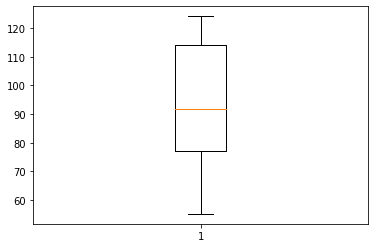

In [397]:
plt.boxplot(data['avg_glucose_level'])
plt.show()

In [398]:
print(data['bmi'].quantile(0.8))
print(data['bmi'].quantile(0.9))
data['bmi'] = np.where(data['bmi']>data['bmi'].quantile(0.9),data['bmi'].quantile(0.80),data['bmi'])

34.3
38.7


In [399]:
print(data['bmi'].quantile(0.25))
data['bmi'] = np.where(data['bmi']<data['bmi'].quantile(0.25),data['bmi'].quantile(0.05),data['bmi'])

23.8


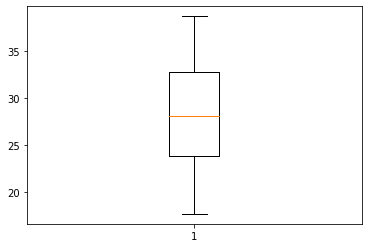

In [400]:
plt.boxplot(data['bmi'])
plt.show()

In [401]:
data['bmi'].describe()

count    5110.000000
mean       27.227065
std         6.422457
min        17.700000
25%        23.800000
50%        28.100000
75%        32.800000
max        38.700000
Name: bmi, dtype: float64

In [402]:
corr = pd.DataFrame.corr(data)


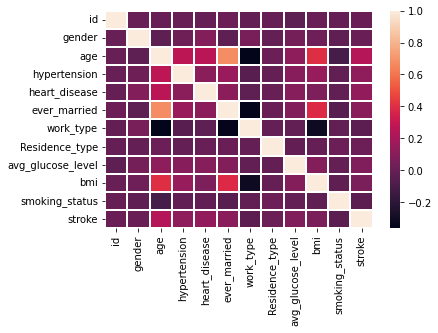

In [403]:
sns.heatmap(corr,linewidth=1)

In [404]:
corr

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.002511,0.003538,0.003550,-0.001296,0.013690,-0.015757,-0.001403,-0.027359,0.005358,-0.004533,0.006388
gender,0.002511,1.000000,-0.028202,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.045926,0.021931,-0.022364,0.008929
age,0.003538,-0.028202,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.123741,0.399359,-0.110513,0.245257
hypertension,0.003550,0.020994,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.105461,0.153182,-0.019199,0.127904
heart_disease,-0.001296,0.085447,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.097685,0.073572,-0.016367,0.134914
ever_married,0.013690,-0.031005,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.085670,0.386410,-0.046820,0.108340
work_type,-0.015757,0.056422,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.019157,-0.316108,-0.020051,-0.032316
Residence_type,-0.001403,-0.006738,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.013146,-0.000406,0.012160,0.015458
avg_glucose_level,-0.027359,0.045926,0.123741,0.105461,0.097685,0.085670,-0.019157,-0.013146,1.000000,0.095626,-0.009888,0.076741
bmi,0.005358,0.021931,0.399359,0.153182,0.073572,0.386410,-0.316108,-0.000406,0.095626,1.000000,-0.021591,0.060262


In [405]:
data.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,94.133569,27.227065,0.981213,0.048728
std,21161.721625,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,21.276594,6.422457,0.572105,0.215320
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,17.700000,0.000000,0.000000
25%,17741.250000,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,1.000000,0.000000
50%,36932.000000,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.100000,1.000000,0.000000
75%,54682.000000,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,1.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,124.160000,38.700000,2.000000,1.000000


In [406]:
list = ['id','ever_married','work_type', 'Residence_type','stroke']

In [407]:
data['age'] = data['age'].astype('int64')

In [408]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 479.2 KB


In [409]:
X = data.drop(list,axis=1)
y = data['stroke']

In [410]:
print(X.shape)
print(y.shape)

(5110, 7)
(5110,)


In [411]:
from sklearn.model_selection import train_test_split

In [412]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [413]:
print(X_test)

      gender  age  hypertension  heart_disease  avg_glucose_level   bmi  \
1439       1   44             0              0              99.34  33.1   
3166       1   52             0              0              75.77  30.0   
4581       0    0             0              0              85.65  17.7   
2137       1   24             0              0              72.29  17.7   
3617       1   48             0              0             113.84  17.7   
...      ...  ...           ...            ...                ...   ...   
4691       1   55             0              0              97.68  34.3   
1529       0   82             0              0             124.16  34.3   
3945       0   75             0              1              83.88  28.1   
4511       0   82             0              0              82.63  17.7   
1218       1    1             0              0              77.91  17.7   

      smoking_status  
1439               1  
3166               0  
4581               1  
2137   

In [414]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=abs(scaler.fit_transform(X_train))
X_test=abs(scaler.fit_transform(X_test))


In [415]:
print(X_train)
print(X_test)


[[1.1804427  0.86104073 0.33160926 ... 0.73761291 1.49222894 0.03922123]
 [0.84543881 0.41579739 3.01559731 ... 0.30634622 0.13202155 0.03922123]
 [1.1804427  0.5478841  0.33160926 ... 1.33678333 0.49123079 1.70356564]
 ...
 [1.1804427  1.12521414 3.01559731 ... 1.41478796 1.44391617 0.03922123]
 [1.1804427  0.72895403 0.33160926 ... 1.41478796 0.99100017 1.7820081 ]
 [0.84543881 0.98817311 0.33160926 ... 1.41478796 1.49222894 0.03922123]]
[[1.21926946 0.07623157 0.31639792 ... 0.23740816 0.92113993 0.00693005]
 [1.21926946 0.43525765 0.31639792 ... 0.86463606 0.44389455 1.76369693]
 [0.82016325 1.89841191 0.31639792 ... 0.40268456 1.44969198 0.00693005]
 ...
 [0.82016325 1.46745765 0.31639792 ... 0.48544308 0.15138931 1.77755702]
 [0.82016325 1.78160548 0.31639792 ... 0.54388836 1.44969198 1.77755702]
 [1.21926946 1.85353365 0.31639792 ... 0.76457774 1.44969198 0.00693005]]


In [416]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100)
lr.fit(X_train,y_train)

LogisticRegression()

In [417]:
import pickle
pickle.dump(lr, open('linearReg.pkl','wb'))


In [418]:
loaded_lr = pickle.load(open('/content/linearReg.pkl','rb'))
result = loaded_lr.score(X_test, y_test)

In [419]:
print(result)

0.952054794520548


In [420]:
y_pred = loaded_lr.predict(X_test)

In [421]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.952054794520548

In [423]:
from sklearn.metrics import f1_score

In [424]:
f1_score(y_test, y_pred, labels=None, pos_label=1, average='weighted')

0.9296254334466303

In [425]:
from sklearn.svm import SVC

In [426]:
SupportVectorClassModel = SVC(coef0=0.5) 
SupportVectorClassModel.fit(X_train,y_train)  

SVC(coef0=0.5)

In [427]:
y_pred_SVC = SupportVectorClassModel.predict(X_test)

In [428]:
accuracySVC = accuracy_score(y_test,y_pred_SVC)*100 

In [429]:
accuracySVC

95.30332681017613